## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
start_time = time.time()

In [2]:
import dendrotweaks as dd
dd.__version__

'0.5.0'

In [3]:
dd.apply_dark_theme()

In [4]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [5]:
model = dd.Model(path_to_model)

## Load model components

In [6]:
model.list_morphologies()

['original', 'main_fully_reduced', 'main', 'main_partially_reduced']

In [7]:
model.load_morphology(file_name='main')

Sorted PointTree(root=Point(idx=0), num_nodes=4071).
Apical dendrite is already aligned.
Extended 184 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=4255).


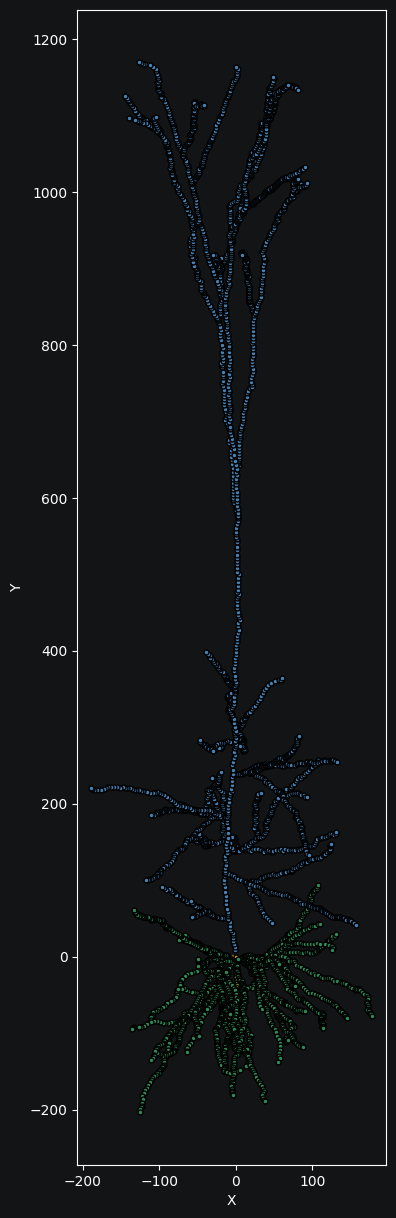

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=False)

In [9]:
model.list_biophys()

['main',
 'main_partially_reduced',
 'passive',
 'main_fully_reduced',
 'main_reduced_apic']

In [10]:
model.load_biophys('main')

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/NaTa_t.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/SKv3_1.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Im.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/K_Pst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/K_Tst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/CaHVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/SK_E2.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Nap_Et2.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/exampl

In [11]:
model.params

{'cm': {'all': constant({'value': 1}),
  'basal': constant({'value': 2}),
  'apical': constant({'value': 2}),
  'somatic': constant({'value': 1}),
  'axonal': constant({'value': 1})},
 'Ra': {'all': constant({'value': 100})},
 'gbar_Leak': {'all': constant({'value': 0.0}),
  'somatic': constant({'value': 3.38e-05}),
  'axonal': constant({'value': 3.25e-05}),
  'basal': constant({'value': 4.67e-05}),
  'apical': constant({'value': 5.89e-05})},
 'e_Leak': {'all': constant({'value': -90})},
 'depth_CaDyn': {'all': constant({'value': 0.1})},
 'taur_CaDyn': {'all': constant({'value': 80}),
  'somatic': constant({'value': 460}),
  'apical': constant({'value': 122})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001})},
 'gamma_CaDyn': {'all': constant({'value': 0.05}),
  'somatic': constant({'value': 0.000501}),
  'apical': constant({'value': 0.000509})},
 'kt_CaDyn': {'all': constant({'value': 0})},
 'kd_CaDyn': {'all': constant({'value': 0})},
 'gbar_K_Tst': {'all': constant({'value': 0.0

In [12]:
model.df_params[model.df_params['Mechanism'] == 'K_Tst']

,Mechanism,Parameter,Group,Distribution,Distribution params
25,K_Tst,gbar_K_Tst,all,constant,{'value': 0.0}
26,K_Tst,gbar_K_Tst,somatic,constant,{'value': 0.0812}


In [13]:
model.df_params[model.df_params['Group'] == 'apical']

,Mechanism,Parameter,Group,Distribution,Distribution params
2,Independent,cm,apical,constant,{'value': 2}
13,Leak,gbar_Leak,apical,constant,{'value': 5.89e-05}
18,CaDyn,taur_CaDyn,apical,constant,{'value': 122}
22,CaDyn,gamma_CaDyn,apical,constant,{'value': 0.000509}
31,SK_E2,gbar_SK_E2,apical,constant,{'value': 0.0012}
33,Im,gbar_Im,apical,constant,{'value': 6.75e-05}
36,CaLVAst,gbar_CaLVAst,apical,step,"{'max_value': 0.0187, 'min_value': 0.000187000..."
41,NaTa_t,gbar_NaTa_t,apical,constant,{'value': 0.0213}
44,SKv3_1,gbar_SKv3_1,apical,constant,{'value': 0.000261}
47,CaHVA,gbar_CaHVA,apical,step,"{'max_value': 0.000555, 'min_value': 5.5500000..."


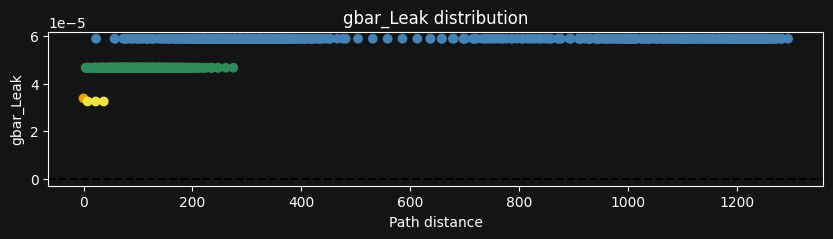

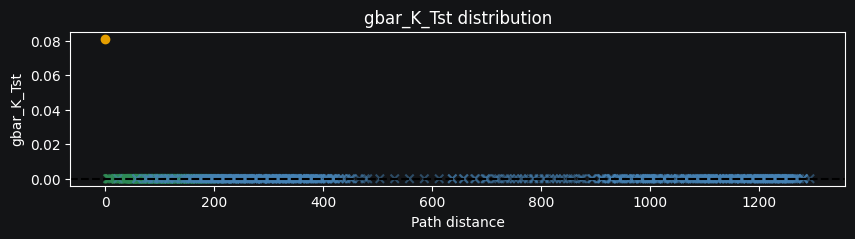

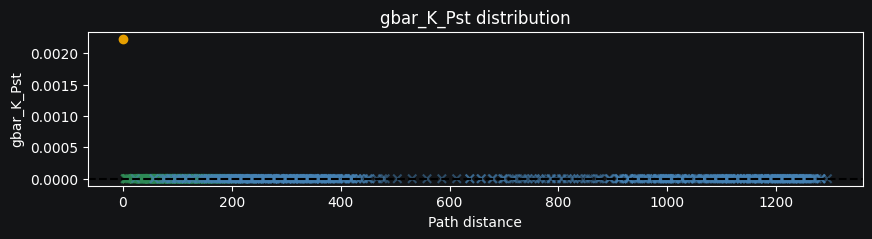

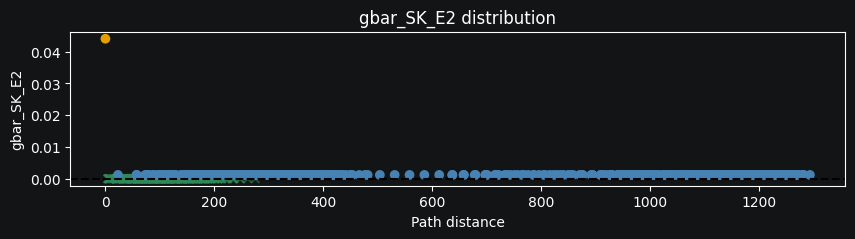

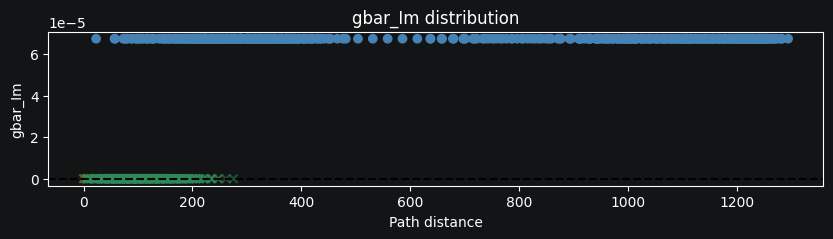

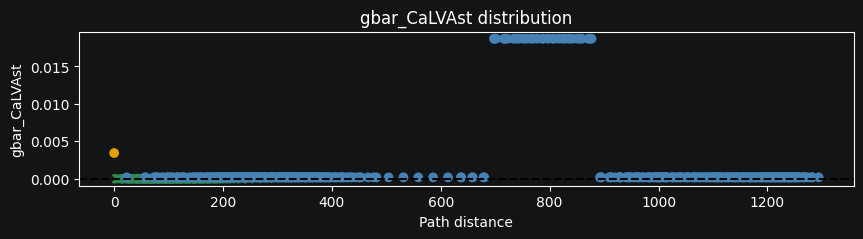

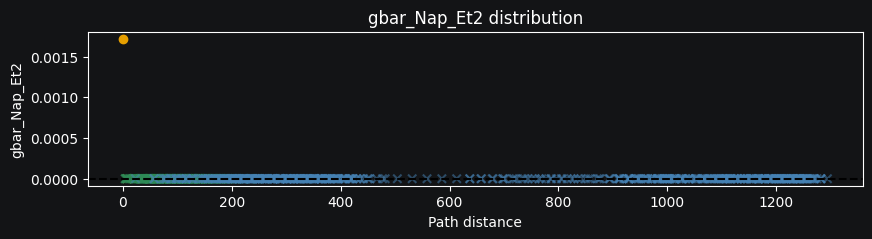

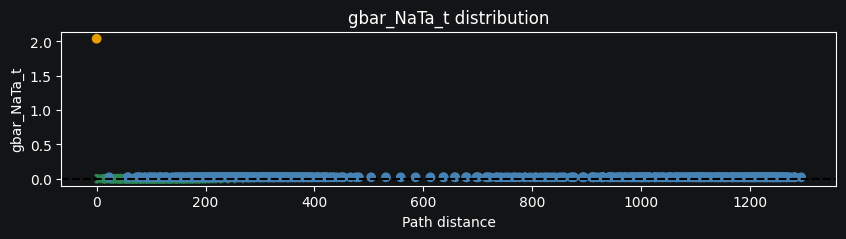

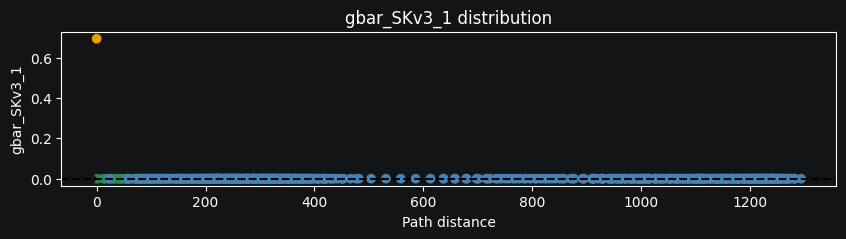

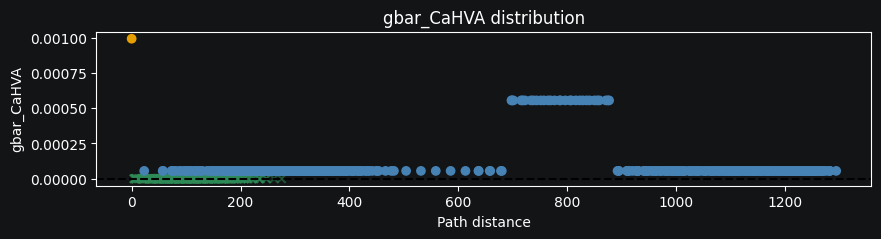

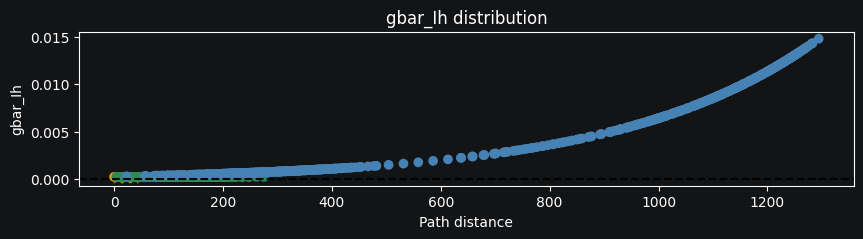

In [14]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

## Reduce apical subtree

In [15]:
root = model.get_sections(lambda sec: sec.domain_name == 'apic' and sec.parent.domain_name == 'soma')[0]
print(root.domain_name, root.parent.domain_name)

apic soma


<Axes: title={'center': 'Radius Distribution - Section 86 (apic)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

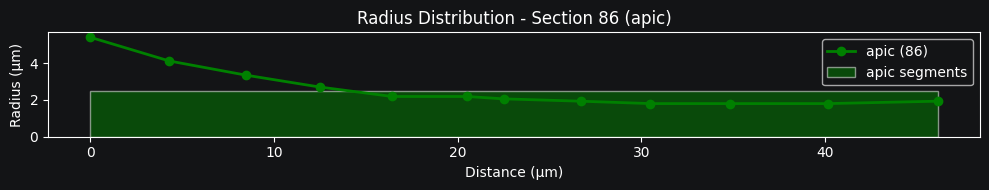

In [16]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [17]:
data = model.reduce_subtree(root, fit=True)

CableParams(length=2419.956820679183, diam=3.739652729314912, space_const=1259.8765552006237, cm=2.0, rm=16977.92869269949, ra=100.0, e_pas=-90.0, electrotonic_length=1.9207888349774294)
Sorted SectionTree(root=NeuronSection(idx=0), num_nodes=190).
Sorted PointTree(root=Point(idx=0), num_nodes=4187).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=994).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=475).
Sorted PointTree(root=Point(idx=0), num_nodes=1742).
Interpolated for ids []


(model.py, line 922)
(model.py, line 555)


In [18]:
# # Fit distributions to data for the group
# group_name = 'apical'
# segments = model.get_segments(group_names=[group_name])
# for param_name in model.params:
#     model.fit_distribution(param_name, segments=segments, plot=True)


## Inspect reduced model

[]

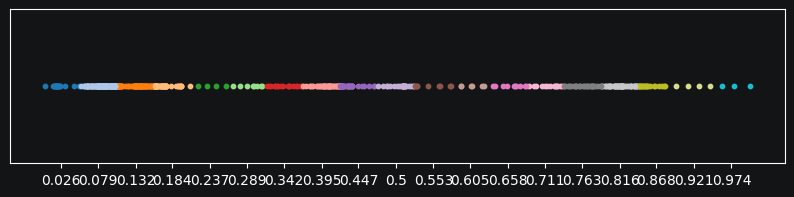

In [19]:
segs_to_reduced_segs = data['segs_to_reduced_segs']
segs_to_locs = data['segs_to_locs']
fig, ax = plt.subplots(figsize=(10, 2))

# Get the number of unique reduced segments
reduced_segs = root.segments
num_segs = len(reduced_segs)

# Create a color map with enough colors
if num_segs <= 10:
    colors = plt.cm.tab10.colors
elif num_segs <= 20:
    colors = plt.cm.tab20.colors
else:
    # For more than 20 segments, create a custom colormap with more colors
    cmap = plt.cm.viridis
    colors = [cmap(i/num_segs) for i in range(num_segs)]

# Map segments to colors
reduced_seg_to_color = {seg: colors[i % len(colors)] for i, seg in enumerate(reduced_segs)}

ax.set_ylim(-1, 1)
for seg, loc in segs_to_locs.items():
    plt.scatter(loc, [0], s=10, color=reduced_seg_to_color[segs_to_reduced_segs[seg]])

norm_centers = np.round(np.array(root.seg_centers)/root.L, 3)
ax.set_xticks(norm_centers)
ax.set_xticklabels(norm_centers)
ax.set_yticks([])

<Axes: title={'center': 'Radius Distribution - Section 86 (reduced_80)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

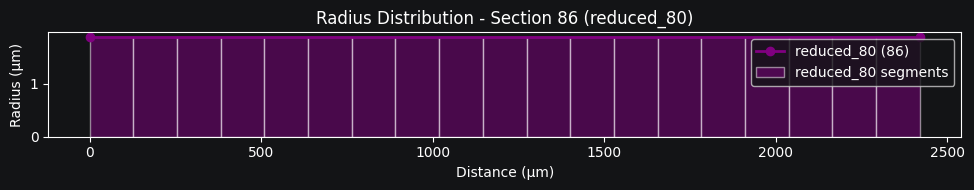

In [20]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [21]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,cm,basal,constant,{'value': 2}
2,Independent,cm,somatic,constant,{'value': 1}
3,Independent,cm,axonal,constant,{'value': 1}
4,Independent,cm,reduced_80,constant,{'value': 2.0}
...,...,...,...,...,...
56,CaHVA,gbar_CaHVA,reduced_80,step,"{'max_value': 0.0005256176470588235, 'min_valu..."
57,Ih,gbar_Ih,all,constant,{'value': 0.0}
58,Ih,gbar_Ih,somatic,constant,{'value': 0.0002}
59,Ih,gbar_Ih,basal,constant,{'value': 0.0002}


In [22]:
model.domains_to_mechs

{'axon': {'Leak'},
 'soma': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'K_Pst',
  'K_Tst',
  'Leak',
  'NaTa_t',
  'Nap_Et2',
  'SK_E2',
  'SKv3_1'},
 'basal': {'Ih', 'Leak'},
 'reduced_80': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'Im',
  'Leak',
  'NaTa_t',
  'SK_E2',
  'SKv3_1'}}

In [23]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'soma', 'basal', 'reduced_80']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'basal': SegmentGroup("basal", domains=['basal']),
 'reduced_80': SegmentGroup("reduced_80", domains=['reduced_80'])}

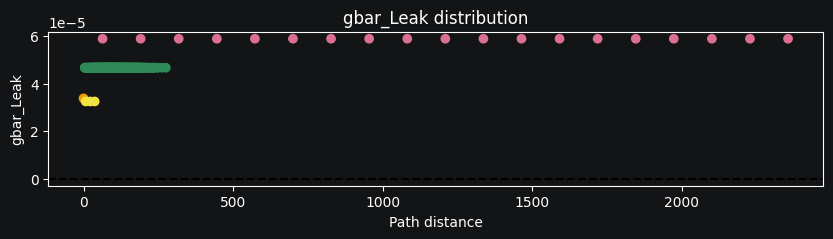

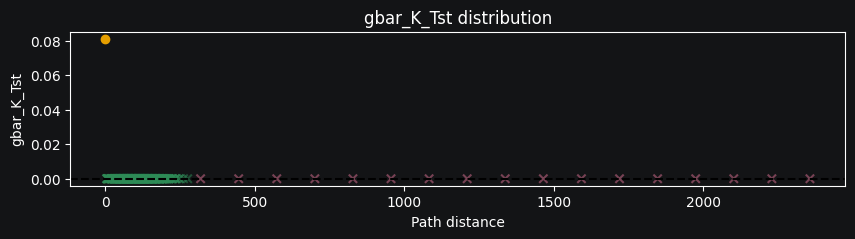

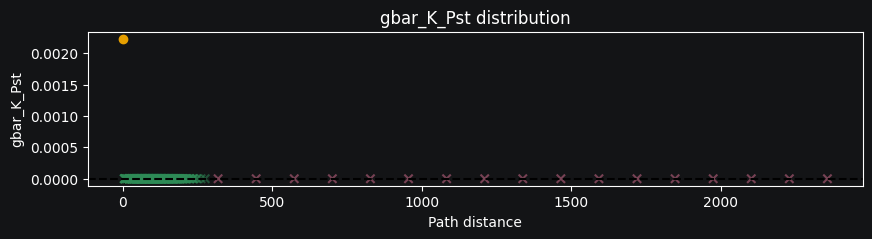

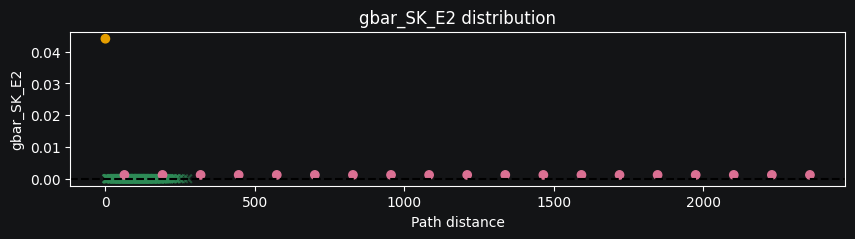

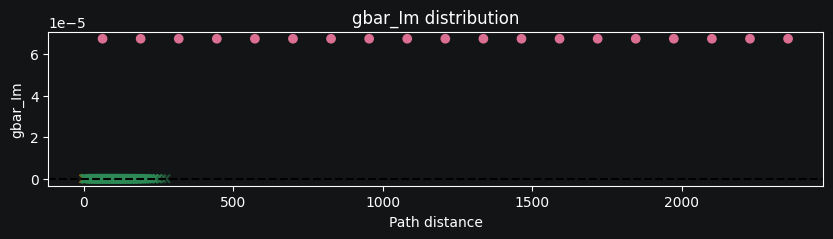

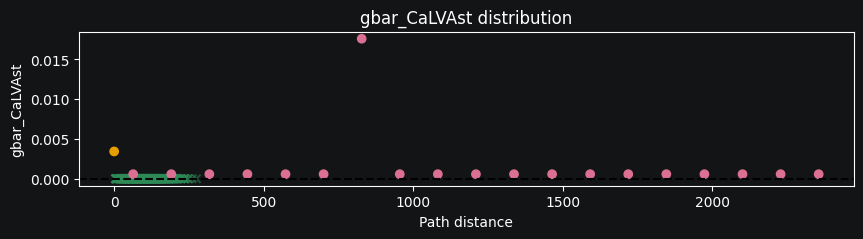

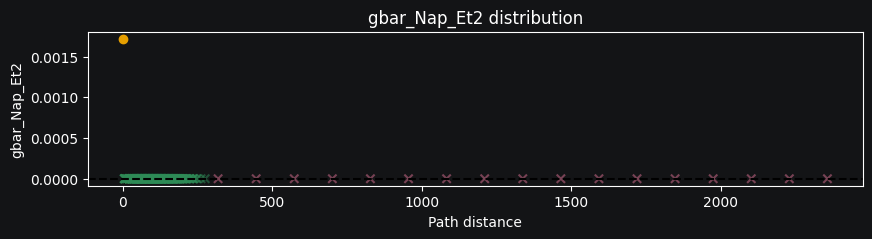

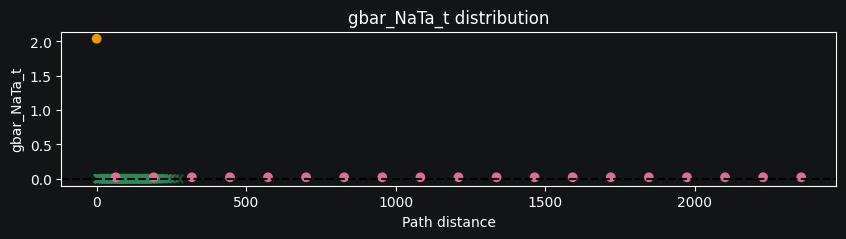

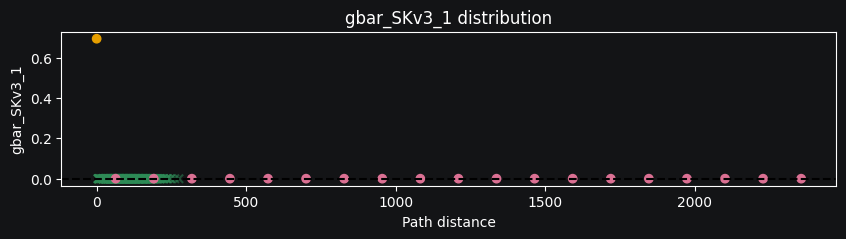

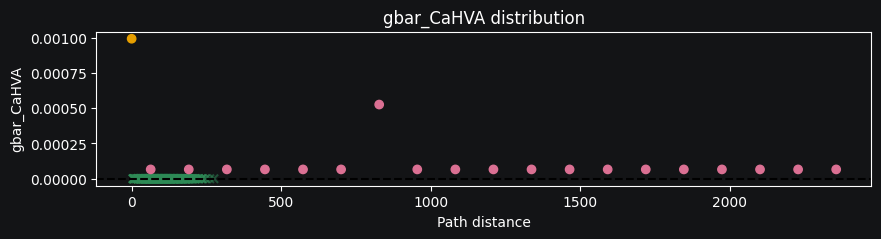

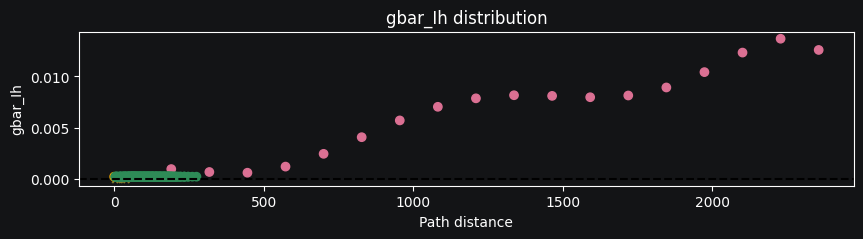

In [24]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

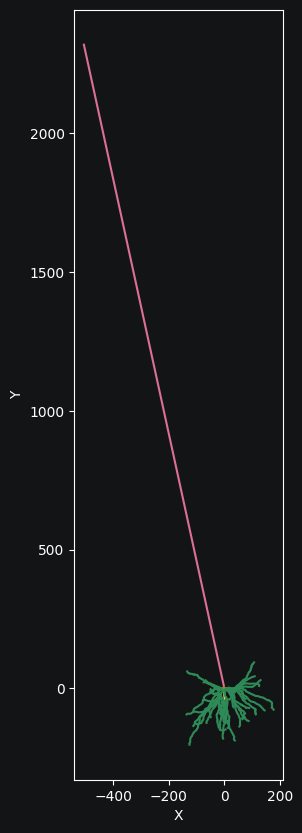

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=False,
                    show_lines=True,
                    annotate=False)

## Run simulation

In [26]:
model.list_stimuli()

['current_soma_depol',
 'syn_20_ampa_nmda_1_gabaa',
 'syn_nonlinearity',
 'current_soma_hyperpol_attenuation',
 'current_dend_hyperpol_attenuation',
 'current_soma_hyperpol',
 'current_syn_ca_spike']

In [27]:
soma = model.sec_tree.soma
model.load_stimuli('current_soma_depol')

In [28]:
model.iclamps[soma(0.5)].amp= 0.793

In [29]:
model.run(1000)

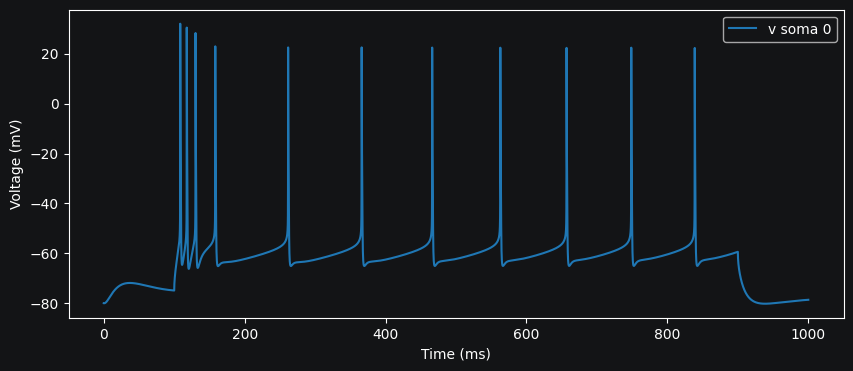

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)

In [31]:
model.export_biophys('main_reduced_apic')

In [32]:
model.df_params[model.df_params['Group'] == 'reduced_0']

,Mechanism,Parameter,Group,Distribution,Distribution params


## Distribution fitting example

In [33]:
from dendrotweaks.utils import poly_fit, step_fit, mse

Step Fit Parameters: (0.5555555555555556, 0.8888888888888888, 0.1, 0.9)


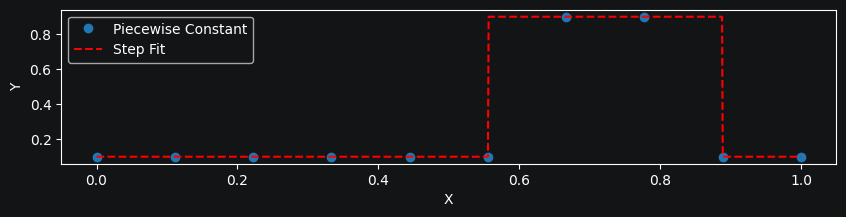

In [34]:
def step(x, start, end, min_y, max_y):
    """
    start < x < end -> max_y
    else -> min_y
    """
    y = np.where((x > start) & (x < end), max_y, min_y)
    return y

x = np.linspace(0, 1, 10)
y = step(x, 0.6, 0.8, 0.1, 0.9)

# try step_fit
params, y_pred = step_fit(x, y)
print("Step Fit Parameters:", params)

x_new = np.linspace(0, 1, 1000)
y_new = step(x_new, *params)

fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(x, y, 'o', label='Piecewise Constant')
ax.plot(x_new, y_new, label='Step Fit', color='red', linestyle='--')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

In [35]:
end_time = time.time()
print(f"Total execution time: {end_time - start_time:.2f} seconds")
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

Total execution time: 18.07 seconds
2025-12-07 12:41:05
